In [1]:
%matplotlib inline

import os
import sys
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

def time_consumed_until_target_loss_val(log_dict, target_loss_val):
    time_consumed = 0
    target_flag = False
    round_duration = log_dict['round_duration']
    for loss_val in log_dict['loss_val']:
        if  loss_val!=None and loss_val < target_loss_val:
            target_flag = True
            break
        time_consumed += round_duration
    if target_flag == True:
        return time_consumed
    else:
        return None
    
def remove_None(list_with_None):
    list_without_None = []
    for i in list_with_None:
        if i!=None:
            list_without_None.append(i)
    return list_without_None

def sort_x_and_y(list_x, list_y):
    list_xy = []
    for x ,y in zip(list_x, list_y):
        list_xy.append((x,y))
    list_xy = sorted(list_xy, key=lambda xy: xy[0])
    list_x = [i[0] for i in list_xy]
    list_y = [i[1] for i in list_xy]
    return list_x, list_y
    
def plot_time_consumed(pkl_files, target_loss_val):
    param_dict = { 'Lambda': False,'round_duration': False, 'local_iter':False, 'local_bs':False}
    template_file = pkl_files[0]
    for idx, log_dict in enumerate(pkl_files):
        if idx==0:
            continue
        for key in param_dict.keys():
            if log_dict[key] != template_file[key]:
                param_dict[key] = True
    for k,v in param_dict.items():
        if v==True:
            param = k
    plot_list_x = []
    plot_list_y = []
    for log_dict in pkl_files:
        plot_list_x.append(log_dict[param])
        plot_list_y.append(time_consumed_until_target_loss_val(log_dict, target_loss_val))
    plt.figure()
    plt.xlabel(param)
    plt.ylabel('time_consumed')
    plt.plot(plot_list_x,plot_list_y, marker='*', linestyle='')
    
def plot_final_loss(pkl_files):
    param_dict = { 'Lambda': False,'round_duration': False, 'local_iter':False, 'local_bs':False}
    template_file = pkl_files[0]
    for idx, log_dict in enumerate(pkl_files):
        if idx==0:
            continue
        for key in param_dict.keys():
            if log_dict[key] != template_file[key]:
                param_dict[key] = True
    for k,v in param_dict.items():
        if v==True:
            param = k
    plot_list_x = []
    plot_list_y = []
    for log_dict in pkl_files:
        plot_list_x.append(log_dict[param])
        plot_list_y.append(min(remove_None(log_dict['loss_val'])))
    plot_list_x,plot_list_y = sort_x_and_y(plot_list_x,plot_list_y)
    plt.figure()
    plt.xlabel(param)
    plt.ylabel('final_val_loss')
    plt.plot(plot_list_x,plot_list_y, marker='*')
    
def plot_final_acc(pkl_files):
    param_dict = { 'Lambda': False,'round_duration': False, 'local_iter':False, 'local_bs':False}
    template_file = pkl_files[0]
    for idx, log_dict in enumerate(pkl_files):
        if idx==0:
            continue
        for key in param_dict.keys():
            if log_dict[key] != template_file[key]:
                param_dict[key] = True
    for k,v in param_dict.items():
        if v==True:
            param = k
    plot_list_x = []
    plot_list_y_top1 = []
    plot_list_y_top5 = []
    plot_list_y_top10 = []
    for log_dict in pkl_files:
        plot_list_x.append(log_dict[param])
        plot_list_y_top1.append(max(remove_None([i[0] for i in log_dict['acc_val']])))
        plot_list_y_top5.append(max(remove_None([i[1] for i in log_dict['acc_val']])))
        plot_list_y_top10.append(max(remove_None([i[2] for i in log_dict['acc_val']])))
    plot_x,plot_y_top1 = sort_x_and_y(plot_list_x,plot_list_y_top1)
    plot_x,plot_y_top5 = sort_x_and_y(plot_list_x,plot_list_y_top5)
    plot_x,plot_y_top10 = sort_x_and_y(plot_list_x,plot_list_y_top10)
    plt.figure()
    plt.xlabel(param)
    plt.ylabel('final_val_acc')
    plt.plot(plot_x,plot_y_top1, color='r', marker='*', label='top1')
    plt.plot(plot_x,plot_y_top5, color='g', marker='*', label='top5')
    plt.plot(plot_x,plot_y_top10, color='m', marker='*', label='top10')
    plt.legend()

'./save/speed30_local_iter_group_coord'

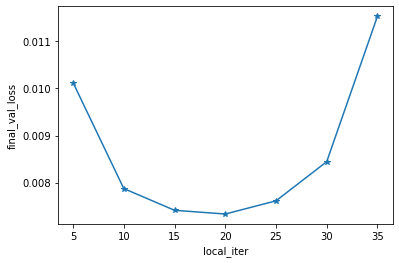

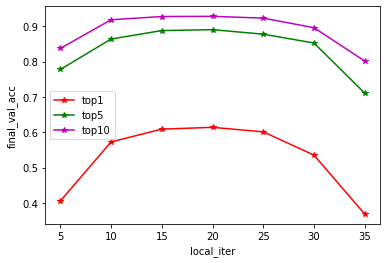

In [5]:
target_dir = './save/speed30_local_iter_group_coord'

pkl_files = []
for file in os.listdir(target_dir):
    if file.endswith('.pkl'):
        pkl_file = os.path.join(target_dir,file)
        with open(pkl_file,'rb') as f:
            pkl_files.append(pkl.load(f))
plot_final_loss(pkl_files),plot_final_acc(pkl_files)
target_dir

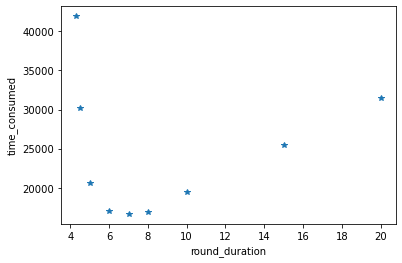

In [13]:
target_loss_val = 0.012

plot_time_consumed(pkl_files, target_loss_val)